In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors
from sklearn.utils import resample # down-sample the dataset
from sklearn.model_selection import train_test_split # split data into training and testing sets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC # this will make a support vector machine for classificaiton


from sklearn.model_selection import GridSearchCV #this will do cross validation
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans


In [40]:
df = pd.read_csv("D:\\programming project\\python project\\Documents\\ml\\processed.cleveland.data",sep=',')

In [41]:
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df.columns = column_names

In [42]:
print(df['sex'].unique())
print(df['ca'].unique())
print(df['thal'].unique())

[1. 0.]
['3.0' '2.0' '0.0' '1.0' '?']
['3.0' '7.0' '6.0' '?']


In [43]:
print(len(df))
print(len(df.loc[(df['ca']=='?') | (df['thal']=='?')]))

302
6


In [44]:
df_no_missing = df.loc[(df['ca']!='?') & (df['thal']!='?')]
print(len(df_no_missing))
df_no_missing.head()

296


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [45]:
X = df_no_missing.drop('num',axis=1).copy()
y = df_no_missing['num'].copy()
y = y.apply(lambda x: 1 if x > 0 else 0)

In [46]:
#convert these categorical variables
X_encoded = pd.get_dummies(X,columns=['sex','cp','fbs','restecg','exang','slope','thal']).astype(float)
X_encoded.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_0.0,sex_1.0,cp_1.0,cp_2.0,...,restecg_1.0,restecg_2.0,exang_0.0,exang_1.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,67.0,160.0,286.0,108.0,1.5,3.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,67.0,120.0,229.0,129.0,2.6,2.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,37.0,130.0,250.0,187.0,3.5,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,41.0,130.0,204.0,172.0,1.4,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,56.0,120.0,236.0,178.0,0.8,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [47]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,random_state=42)
#splitting train test data for both X and y

In [48]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [49]:
clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train_scaled,y_train)


SVC(random_state=42)

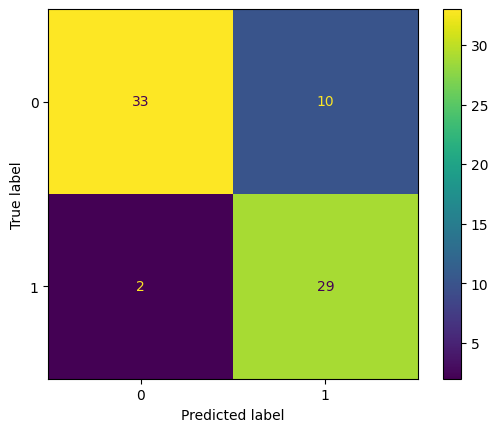

Precision: 0.7436
Accuracy: 0.8378
Sensitivity (Recall): 0.9355


In [50]:
def plot_confusion_mat():
    predictions = clf_svm.predict(X_test_scaled)
    cm = confusion_matrix(y_test, predictions, labels=clf_svm.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
    display_labels=clf_svm.classes_)
    disp.plot()
    plt.show()
    # Calculate precision, accuracy, and sensitivity
    precision = precision_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    sensitivity = recall_score(y_test, predictions)
    
    print(f'Precision: {precision:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Sensitivity (Recall): {sensitivity:.4f}')
plot_confusion_mat()

In [35]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
kmeans.fit(X_train_scaled, y_train)

KMeans(n_clusters=2, random_state=42)

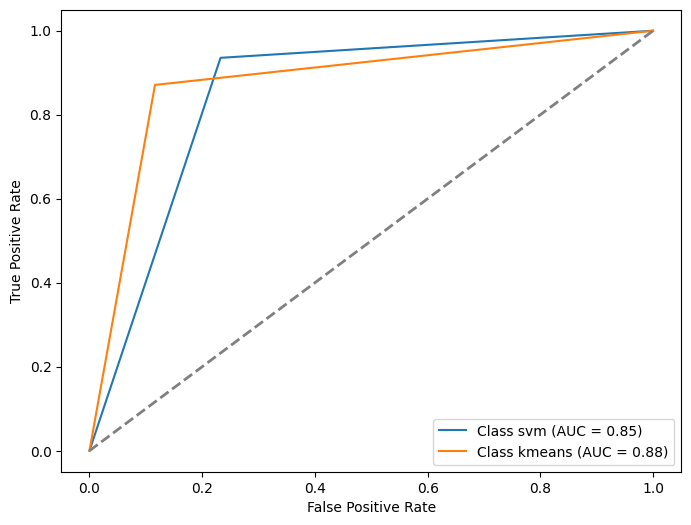

In [51]:
y_score_svm = clf_svm.predict(X_test_scaled)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

y_score_kmeans = kmeans.predict(X_test_scaled)
fpr_kmeans, tpr_kmeans, thresholds_kmeans = roc_curve(y_test, y_score_kmeans)
roc_auc_kmeans = auc(fpr_kmeans, tpr_kmeans)

plt.figure(figsize=(8, 6))

plt.plot(fpr_svm, tpr_svm, label=f'Class svm (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_kmeans, tpr_kmeans, label=f'Class kmeans (AUC = {roc_auc_kmeans:.2f})')

# Plot a diagonal line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)

# Set plot labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title(f'ROC Curve for Class {class_index}')
plt.legend(loc='lower right')

# Show the plot
plt.show()

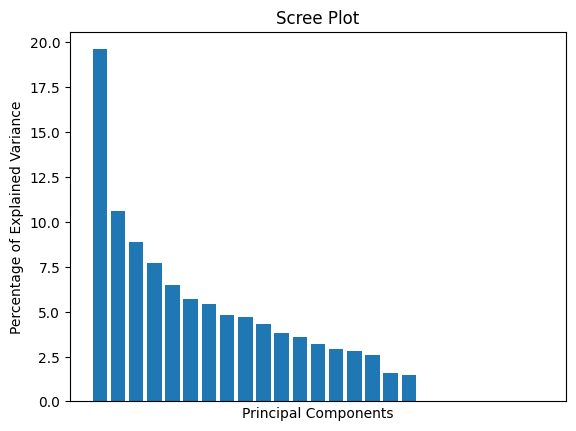

In [52]:
pca= PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(
axis='x',# changes apply to the x-axis
which='both',# both major and minor ticks are affected
bottom=False,# ticks along the bottom edge are off
top=False,# ticks along the top edge are off
labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [53]:
train_pc_1_cord = X_train_pca[:, 0]
train_pc_2_cord = X_train_pca[:, 1]

pca_train_scaled = scaler.fit_transform(np.vstack((train_pc_1_cord, train_pc_2_cord)).T)

param_grid = [
{'C': [1, 10, 100,1000],
'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf']},
]
optimal_params = GridSearchCV(
SVC(),
param_grid,
cv=5,
scoring='accuracy',
verbose=0)

optimal_params.fit(pca_train_scaled, y_train)

print(optimal_params.best_params_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [54]:
clf_svm = SVC(random_state = 42,C=1000,gamma=0.001)
clf_svm.fit(pca_train_scaled,y_train)

SVC(C=1000, gamma=0.001, random_state=42)

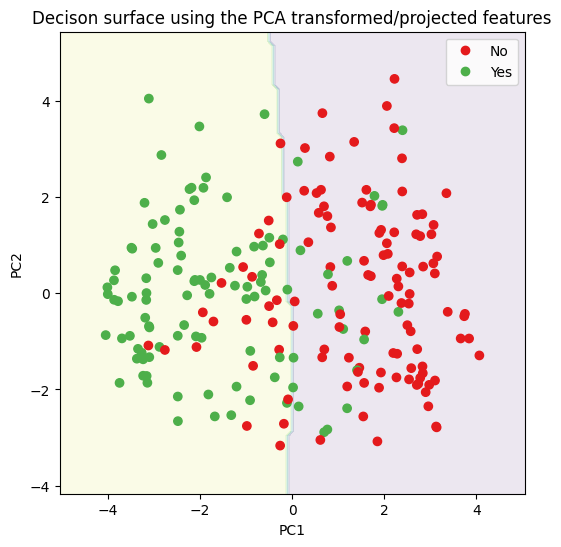

In [56]:
X_test_pca = pca.transform(X_train_scaled)
test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]
x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max =test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
np.arange(start=y_min, stop=y_max, step=0.1))
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel( ))))
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(6,6))
ax.contourf(xx, yy, Z, alpha=0.1)

## now create custom colors for the actual data points
cmap = colors.ListedColormap( ['#e41a1c', '#4daf4a'])
scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train,cmap=cmap)

## now create a legend
legend = ax. legend(scatter. legend_elements() [0],
scatter. legend_elements() [1],
loc="upper right")
legend.get_texts() [0].set_text("No")
legend.get_texts() [1].set_text("Yes")

## now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decison surface using the PCA transformed/projected features')
# plt.savefig('svm_default.png')
plt.show()